# Mathematical Underpinnings - Lab 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)

## Task 1

### a)



We know that:

$$\mathbb{E}X^2 = Var X + (\mathbb{E} X )^2 = 1 + 0^2 = 1,$$

$$\mathbb{E} X(X+\epsilon) = \mathbb{E}X^2 + \mathbb{E}X\epsilon = 1 + \mathbb{E}X \mathbb{E}\epsilon = 1 + 0 = 1,$$

$$\mathbb{E}(X+\epsilon)^2 = \mathbb{E} (X^2 + 2X\epsilon + \epsilon^2) = \mathbb{E}X^2 + 2 \mathbb{E}X\epsilon + \mathbb{E} \epsilon^2 = 1 + 0 + Var\epsilon + (\mathbb{E}\epsilon)^2 = 1 + \sigma^2.$$

Thus,

$$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(aX - (X + \epsilon)^2) = a^2 \mathbb{E} X^2 - 2a \mathbb{E} X(X+\epsilon) + \mathbb{E} (X + \epsilon)^2 = a^2 - 2a + 1 + \sigma^2 = (a-1)^2 + \sigma^2,$$

In our task we know $a^* = 1$.

In [2]:
def population_risk(a, sigma_eps):
    return (a - 1) ** 2 + sigma_eps**2

### b)

In [3]:
# sampling

n = 50
sigma_eps = 1

x = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma_eps, n)
y = x + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.mean(np.square(a * x - y))

In [5]:
empirical_risk(1, x, y)

1.0149809795416014

### c)

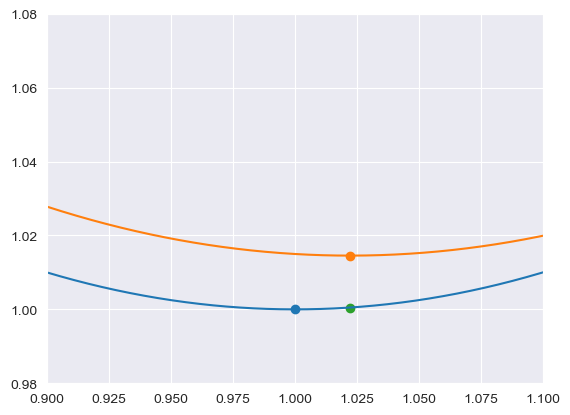

In [6]:
# code, plot
X_list = np.linspace(0, 2, num=10000) # <- these are candidates for a in our model
population_risk_calculated = population_risk(X_list, sigma_eps)
empirical_risk_vector = [empirical_risk(x_i, x, y) for x_i in X_list]


plt.plot(X_list, population_risk_calculated)
plt.plot(X_list, empirical_risk_vector)

plt.scatter(X_list[np.argmin(population_risk_calculated)], np.min(population_risk_calculated))
plt.scatter(X_list[np.argmin(empirical_risk_vector)], np.min(empirical_risk_vector))
plt.scatter(X_list[np.argmin(empirical_risk_vector)], population_risk_calculated[np.argmin(empirical_risk_vector)])

plt.xlim(0.9, 1.1)
plt.ylim(0.98, 1.08)

plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [7]:
# excess risk

def excess_risk(a_hat, a0, sigma_eps):
    return population_risk(a_hat, sigma_eps) - population_risk(a0, sigma_eps)


a0 = X_list[np.argmin(population_risk_calculated)]
a_hat = X_list[np.argmin(empirical_risk_vector)]
sigma = population_risk_calculated[np.argmin(empirical_risk_vector)]
print(excess_risk(a_hat, a0, sigma))

0.0004973794709204338


In [8]:
# simulations with fixed sample size
n, L = 50, 200


def simulate(n, L, sigma, a0):
    excess_risk = np.zeros(L)

    for i in range(L):
        x = np.random.normal(0, 1, n)
        eps = np.random.normal(0, sigma, n)
        y = a0 * x + eps

        a_hat = np.sum(x * y) / np.sum(x**2)

        excess_risk[i] = population_risk(a_hat, sigma) - population_risk(a0, sigma)

    return np.mean(excess_risk)

simulate(n, L, sigma, a0)

0.023167596417199655

In [9]:
# simulations for various sample sizes

n_seq = [25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
means = []
for n in n_seq:
    means.append(simulate(n, L, sigma, a0))

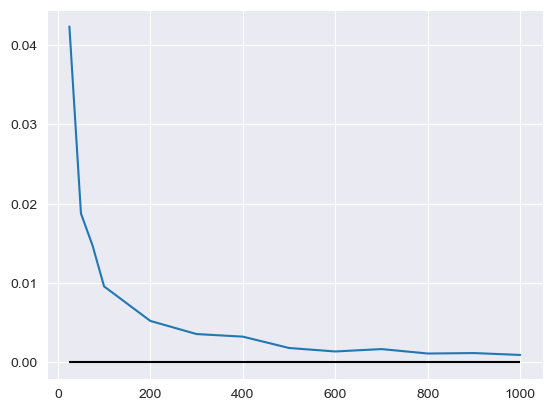

In [10]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)

plt.plot(n_seq, means)
plt.hlines(0, 25, max(n_seq), color="black")
plt.show()